<a href="https://colab.research.google.com/github/Highflying07/Data-Science/blob/main/EDA_To_Prediction(DieTanic).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
마크다운

NameError: name '마크다운' is not defined

** Part 1 : EDA(exploratory Data Analysis **

1) Analysis of the features

2) Finding any relations or trends considering mu7ltiple features.


Part 2 : Feature Engineering and Data clearing

1) Adding any few features

2) Removing redundants features

3) Converting featuring into suitable form for modeling


Part 3 : Predictive Modeling

1) Running Basic Algorithms.

2) Cross Validatatino

3) Ensembling

4) Important Feature Extraction


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [30]:
df=pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [31]:
#결측치 확인
df.isnull().sum() #checking for total null values

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


The Age, Cabin and Embarked have null values. so I will try to fix them.

 How many survived??

Text(0.5, 1.0, 'Survived')

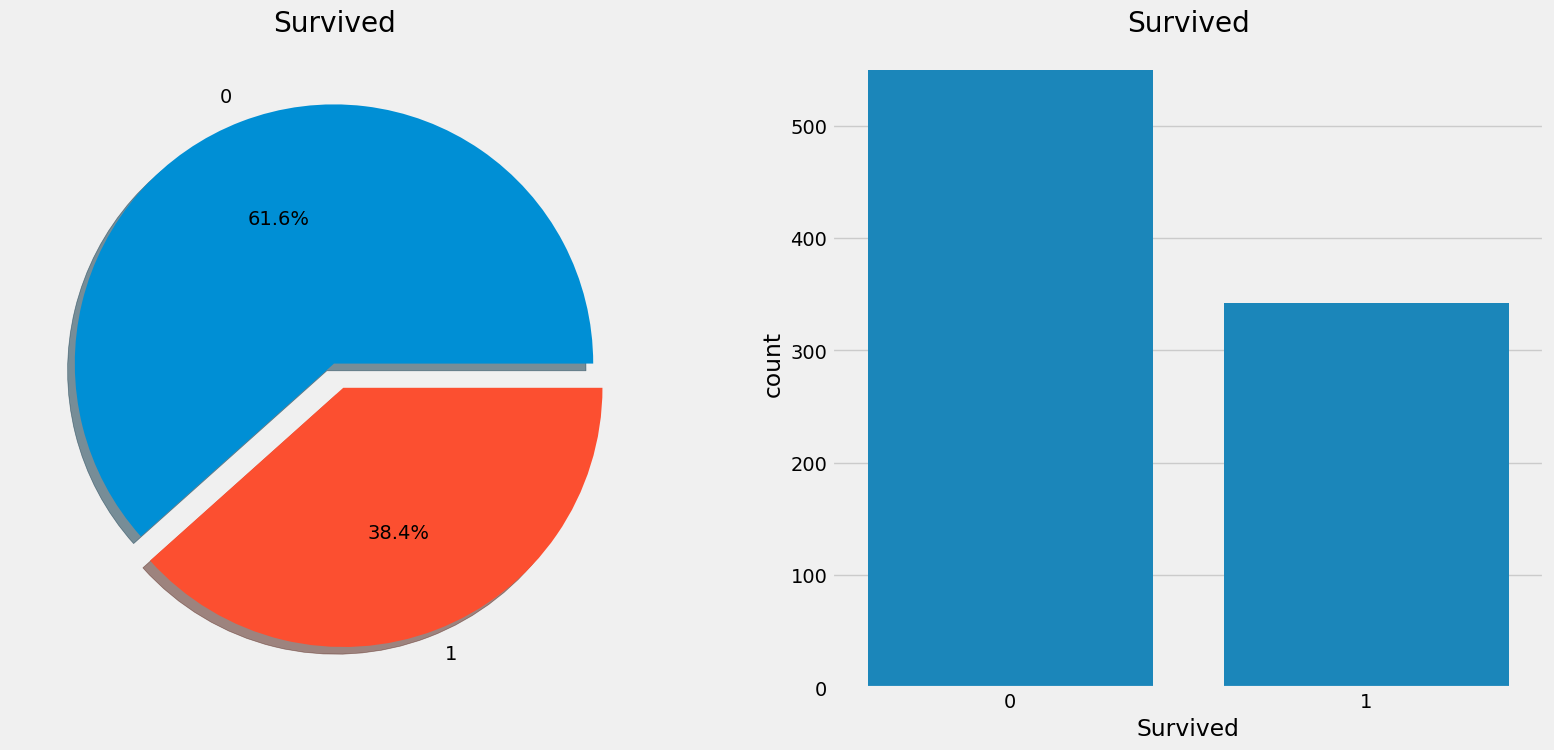

In [36]:
f, ax = plt.subplots(1,2,figsize=(18,8))
df['Survived'].value_counts().plot.pie(explode=[0,0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot(x='Survived',  data = df, ax=ax[1])
ax[1].set_title('Survived')


It's evident that not many passengers sruvived the accident.

out of 891 passengers in the training set, only around 350 sruvived
Only 38.4% of the total of the total training set sruvived the crash. We need to dig down to get better insights from teh data and see which categories of the passengers did survived and who didn't

We will try to check rate by using the different features of the dataset. Some of the features being Sex, Port of Embarcation, Age etc.

First let us udnerstand the different types of features.

Type of Features

Categorical Features:
A catagorical Vvariable is one that has two or more categories and each value in that feature can be categorised by them for example, gender is cac ategorical varibale ahve ing two categories (*maale and female). Now ed cannot sor or give any ordering to such variables. They are slso known as Nominnal Variables.

Categorical Features in teh datasset : Sex, Embarked.

Ordinal Featuers:
An dorinal variables is similar to categorical values, but the difference between them isthat we can have relative ordering or sorting betwween the values. for eg: If we have a feature like Height with values, Tall, Medium, Short, then Height is a ordinal variable. Her we can have a relative sort in the variable.

Ordinal Features in the dataset : PClass

Continous Feature:
A feature is daid to be continou if it can take values between any two points or bettween the minimum or maximum values in the features column.

continous Features in the dataset: Age

Analysing the Features

Sex  --> Categorical Feature

In [43]:
df.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

Text(0.5, 1.0, 'Sex:Survived vs Dead')

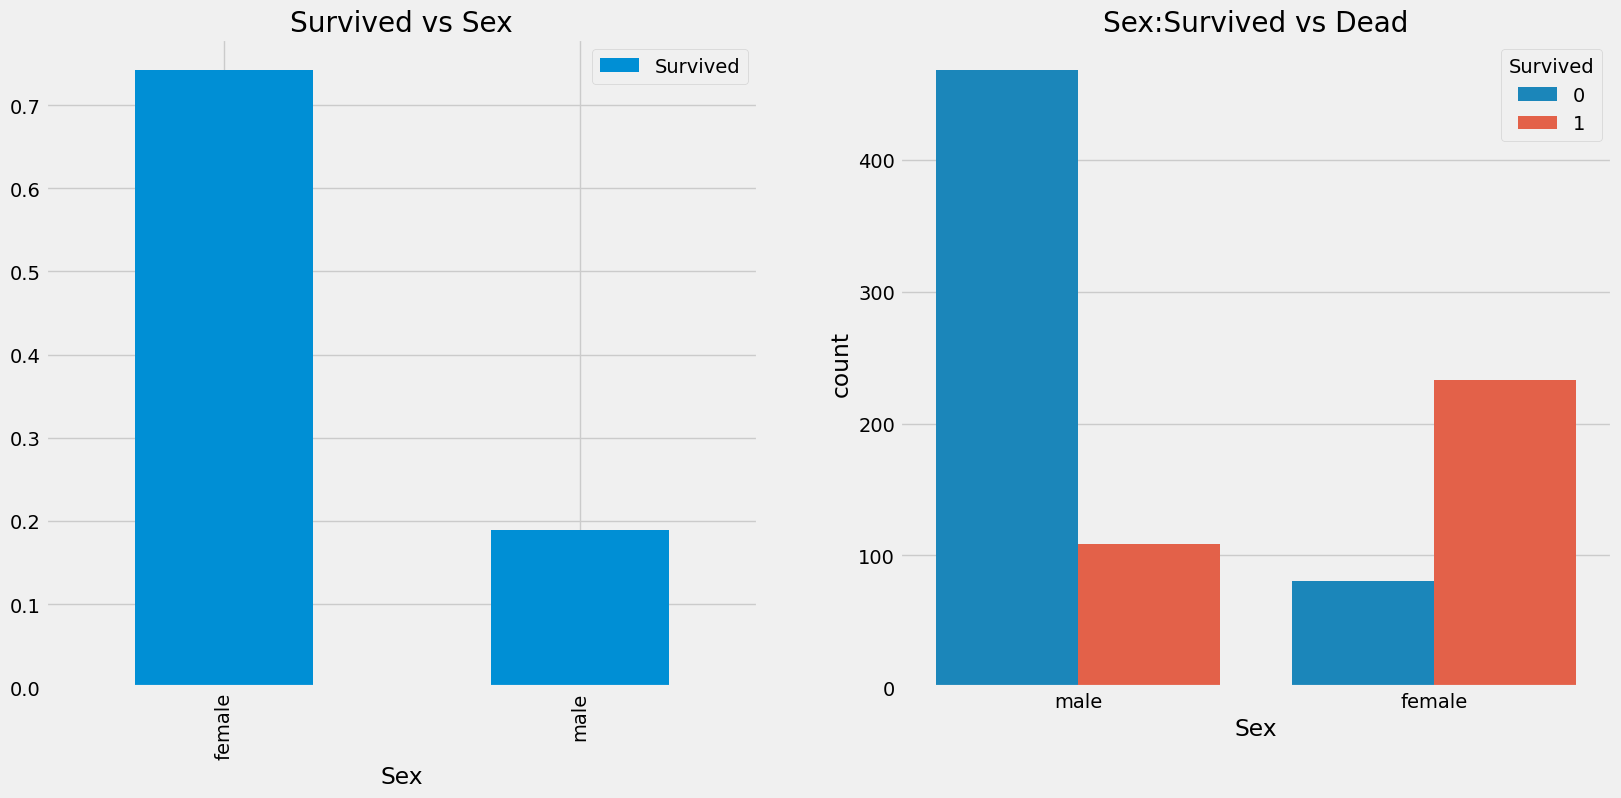

In [47]:
f, ax=plt.subplots(1,2,figsize=(18,8))
data[['Sex', 'Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')

sns.countplot(x='Sex', hue="Survived", data=df, ax=ax[1])
ax[1].set_title('Sex:Survived vs Dead')

This looks interesting. the number of men on the ship is lot more than the number of women, Still the number of women saved iss almost twice the number of males saved. The survival rates fo r awomen on the ship is around 75% while that for men in around 18-19%.

This looks to be a very important feature ofor modeling. But is it the best?? Let's check out other features.

# **PClass --> Ordinal Feature**

In [55]:
# df.head()
pd.crosstab(df.Pclass, df.Survived, margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


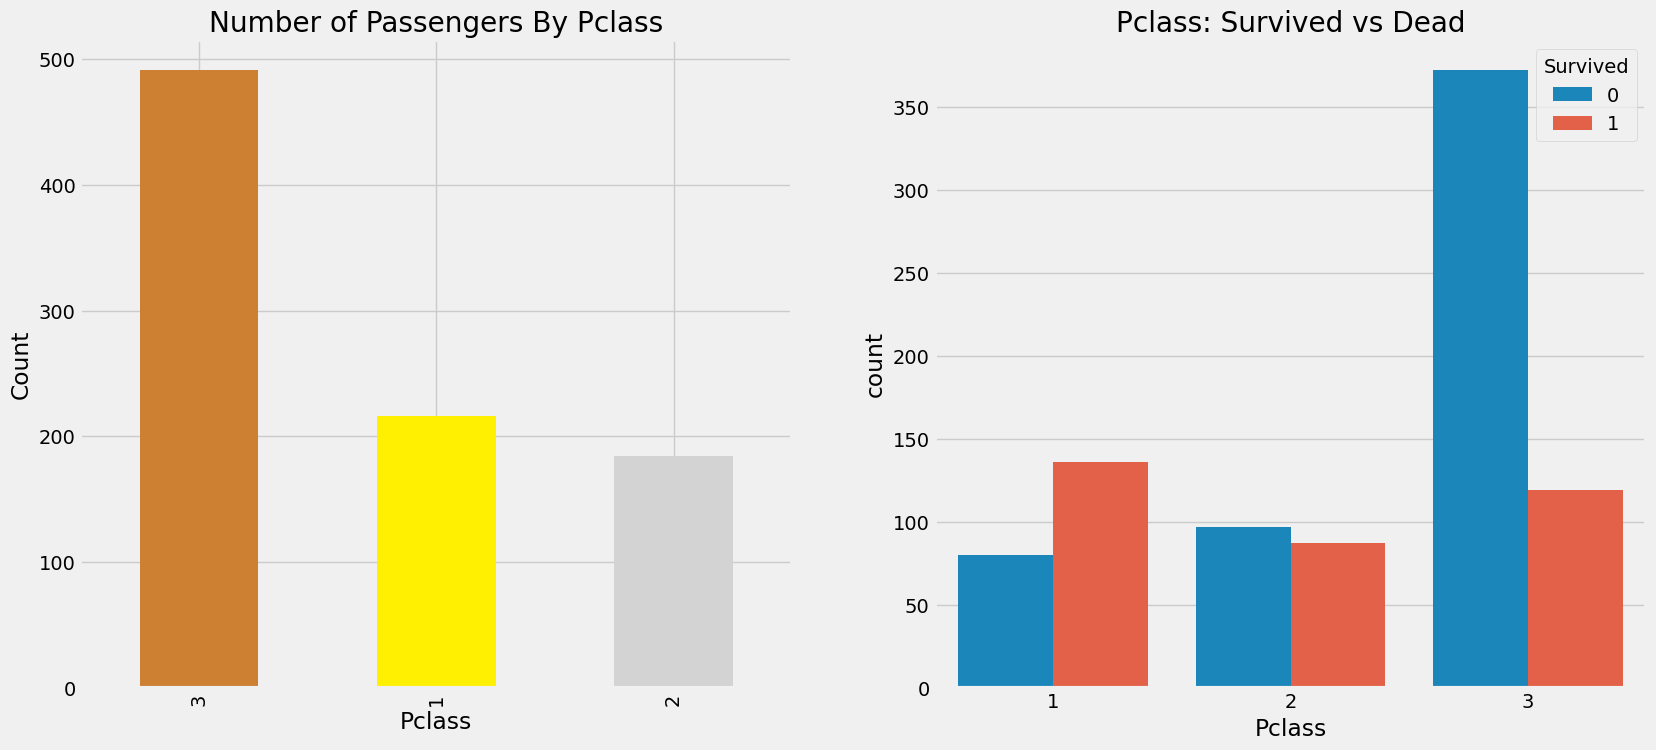

In [62]:
f, ax=plt.subplots(1,2,figsize=(18,8))

df['Pclass'].value_counts().plot.bar(color=['#CD7F32', '#FFEF00', '#D3D3D3'], ax=ax[0])
ax[0].set_title('Number of Passengers By Pclass')
ax[0].set_ylabel('Count')

sns.countplot(x='Pclass', hue="Survived", data=df, ax=ax[1])
ax[1].set_title('Pclass: Survived vs Dead')
plt.show()

People say Money Can't Buy Everthing. But we can clearly see theat passengers of Pclass 1 were given a very high priority while rescue. Even though the number of Passengers in Pclass 3 were a lot higher, still the number of survival from them is very low, somewhere around 25%.

For Pclass 1% survived is around 63% while for Pclass 2 is around 48%. So many and status matters. Such a materialistic world.

Lets Dive in little bit more and check for other interesting observations. let's check survival rate with Sex and Pclass togegether.

In [71]:
pd.crosstab([df.Sex, df.Survived], df.Pclass, margins=True).style.background_gradient(cmap='summer_r')

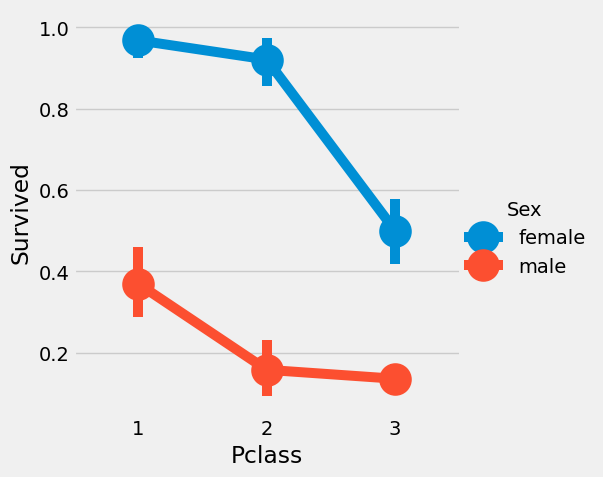

In [77]:
sns.catplot(x='Pclass', y='Survived', hue='Sex', data=df, kind='point') #factorplot은 outdated instead using catplot, kind=''




It iis evident that irrespective of Pclass, Women were given first pirority while rescure, Even Men from Pclass 1 have a very low sruvival rate.

we use catplot in this case, because they make the seperation of categoricla values easy. Looking a the CrossTalbe and the Catlot, we can easily infer that sruvival fo rWomen for Pclass 1 is about 95-96%, as only 3 out of 94 Women from Pclass 1 died.

It is eviden taht irrespective of Pclass , Women were gtive first prioty while rexcure Enve mene form Pcalss 1 have a very low sruvival rate. Looks like pclass is also an imortant reatuer. Le'ts anlayse other features.


## **Age --> Continous Feature**

In [94]:
print('Oldest Passenger was of ;' , df['Age'].max(), 'Years')
print('Youngest Passenger ws of :', df['Age'].min(), 'Years')
print('Average Age on the ship:', df['Age'].mean(), 'Years')

Oldest Passenger was of ; 80.0 Years
Youngest Passenger ws of : 0.42 Years
Average Age on the ship: 29.69911764705882 Years


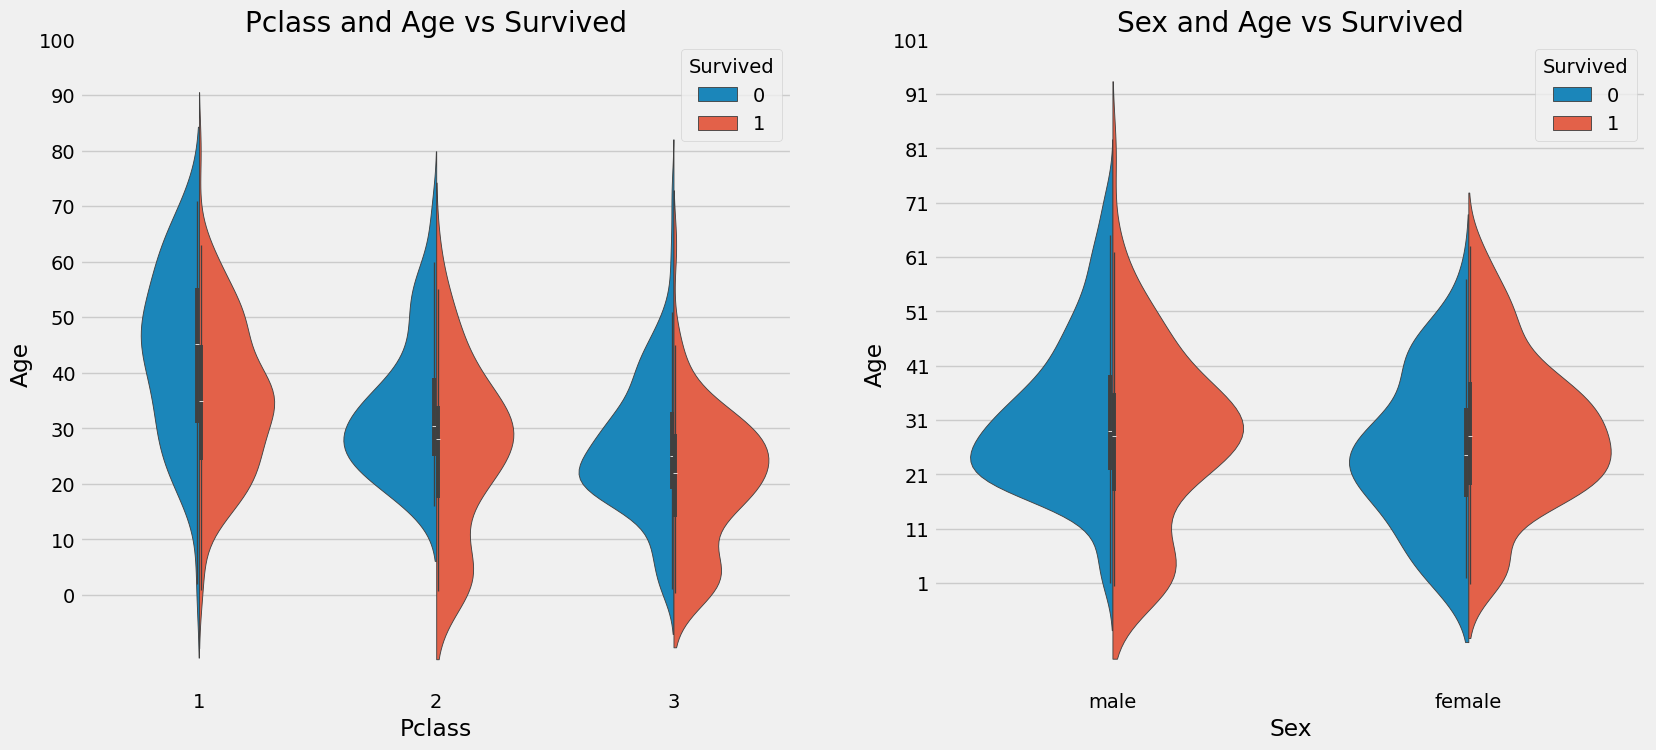

In [110]:
f, ax=plt.subplots(1,2,figsize=(18,8))
sns.violinplot(x='Pclass', y='Age', hue='Survived', data=df, split=True, ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))

sns.violinplot(x='Sex', y='Age', hue='Survived', data=df, split=True, ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(1, 110, 10))

Observations:

1) The number of childern increased with Pclass and the survival rate for passengers below Age 10(i.e childeren)lloks to be good irrespretive of the Pclass.

2) Survivla changes for Passengers agerd 20-50 from Pclass 1 is high and i seven better for Women.

3) For males, the survivla changes decreased with an increase in age.

As we had seen earlier the Age feature ahs 177 nulll values . to replace thise Nan values we cna assign them th eman age foo the data set.

but the problem is tee ewee many people with amny differne ages. we just cann't assign a 4 year kid with the mean age that i s29 years is there any way to find out what age-band does the passengers lie??

Bingo!! we can check the Name feature. Looking upoon the feature , we cna see that the names have a salutation like Mr or Mrs thus we can asign th mena values of Mr and Mrs to the respective groups.

What's in A Name?? -- Feature

In [125]:
df.head()
df['Inital']=0
for i in df:
  df['Initial']=df.Name.str.extract('([A-Za-z]+)\.')

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Inital,Initial
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,Mr


Ok, so here we are suing the Regex: [A-Za-z+).. So what it does is it looks for strings which lie between A-Z or a-z and floolwed by a.(dot). So we successfully extract the ininitials form the Name.


In [124]:
pd.crosstab(df.Initial, df.Sex).T.style.background_gradient(cmap='summer_r')

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


O. so there aer some missped initioals like Mile or Mne that stand for Miss. I will replact ehem with Miss and same thinkg for other values.

In [151]:
df['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'], inplace=True)

In [152]:
df.head()
# df = df.tail('Inital', axis=1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [155]:
df.groupby('Initial')['Age'].mean()

,Age
Initial,
Master,4.574167
Miss,21.860000
Mr,32.739609
Mrs,35.981818
Other,45.888889


Filling NaN Ages

In [168]:
## Assigning the Nan Values with the Ceil Values of the mean ages

df.loc[(df.Age.isnull()) & (df.Initial=='Mr'), 'Age']=33
df.loc[(df.Age.isnull()) & (df.Initial=='Mrs'), 'Age']=36
df.loc[(df.Age.isnull()) & (df.Initial=='Master'), 'Age'] = 5
df.loc[(df.Age.isnull()) & (df.Initial=='Miss'), 'Age'] = 22
df.loc[(df.Age.isnull()) & (df.Initial=='Other'), 'Age']= 46

In [169]:
df.Age.isnull().any()

np.False_

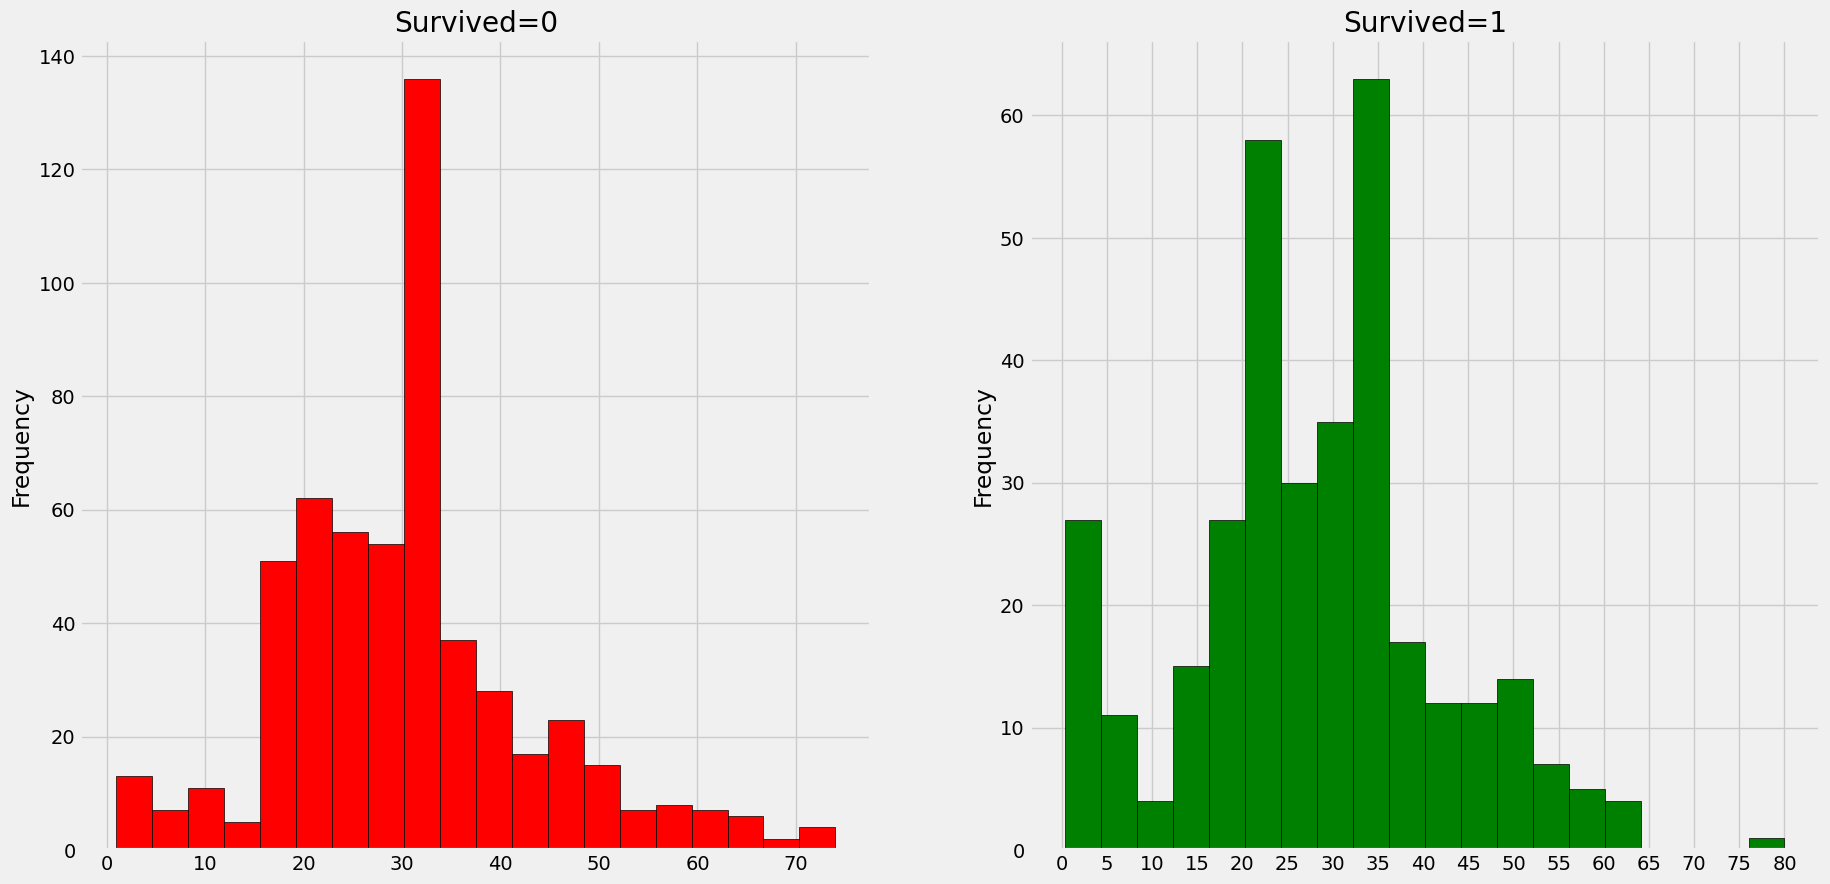

In [179]:
f, ax=plt.subplots(1,2,figsize = (20,10))
df[df['Survived']==0].Age.plot.hist(ax=ax[0], bins=20, edgecolor='black', color='red')
ax[0].set_title('Survived=0')
x1=list(range(0, 85, 5))
df[df['Survived']==1].Age.plot.hist(ax=ax[1], color='green', bins=20, edgecolor='black')
ax[1].set_title('Survived=1')
x2=list(range(0,85,5))
ax[1].set_xticks(x2)


Observations

1) The toddlers(age<5) were saved in large numbers(The Women and Child First Policy)

2) The olderst Passenger was saved (80 years)

3) Maximum number of deaths were in the age group of 30-40


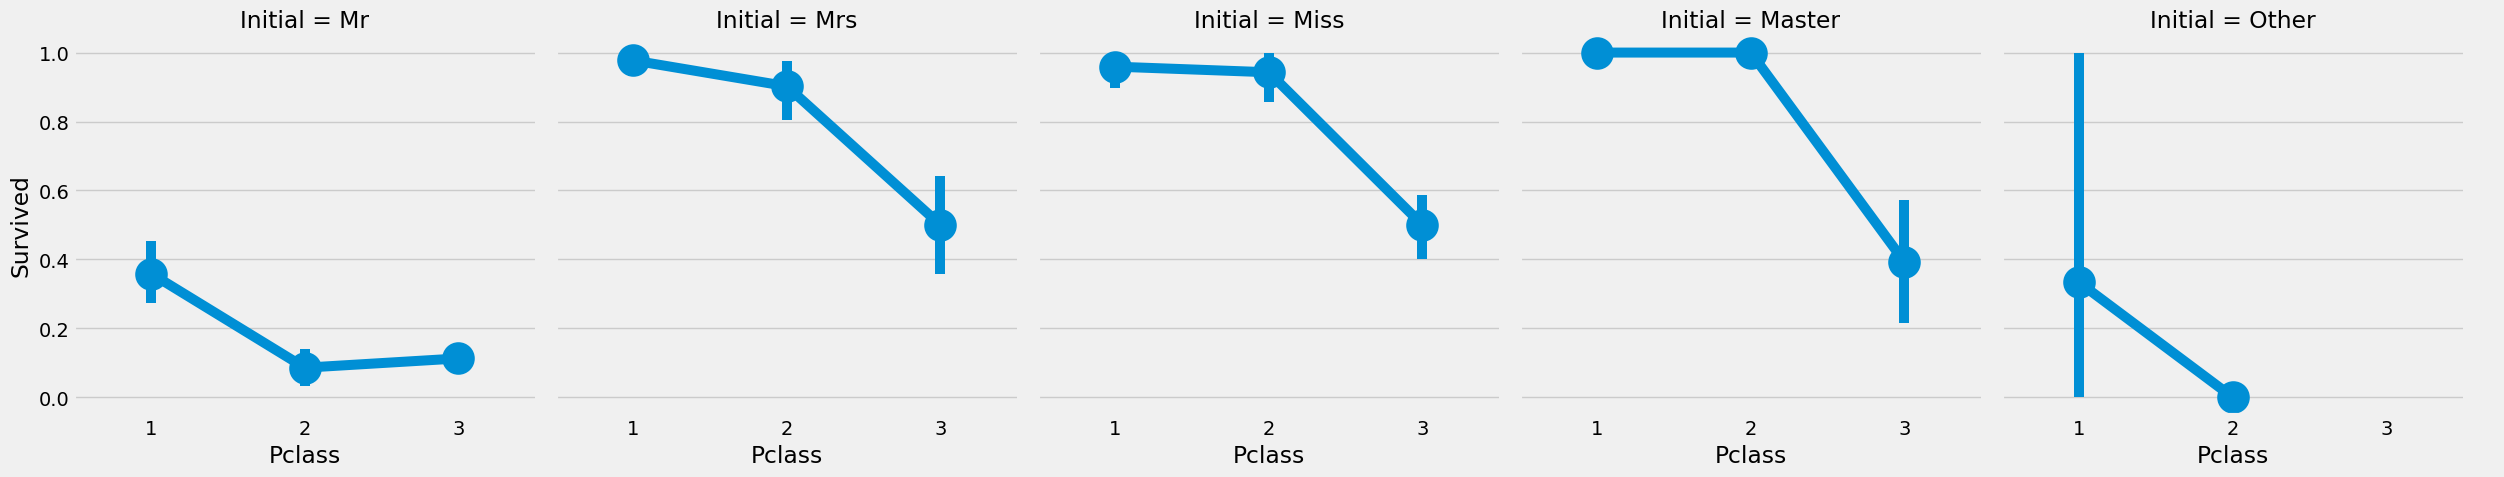

In [182]:
sns.catplot(x='Pclass', y='Survived', col="Initial", data=df, kind='point')

The women and child first pllicy thus holds irrespective of the class

### **Embarked --> Categorical Value**

In [188]:
pd.crosstab([df.Embarked, df.Pclass], [df.Sex, df.Survived], margins=True). style.background_gradient(cmap='summer_r')

Chances for Survival by Port Of Embarkation

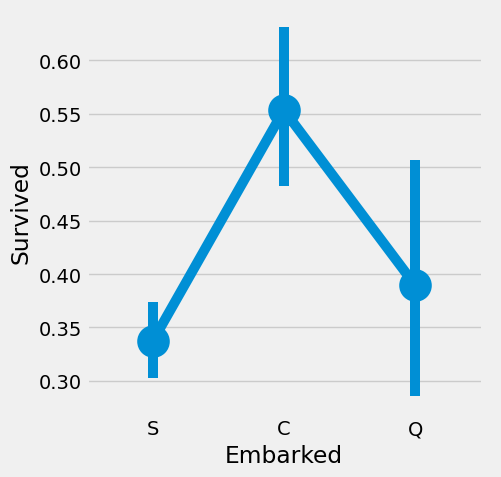

In [191]:
sns.catplot(x='Embarked', y='Survived', data=df, kind='point')

The chances for survivial for Port C is hightes around 0.55 while it is lowest for S.

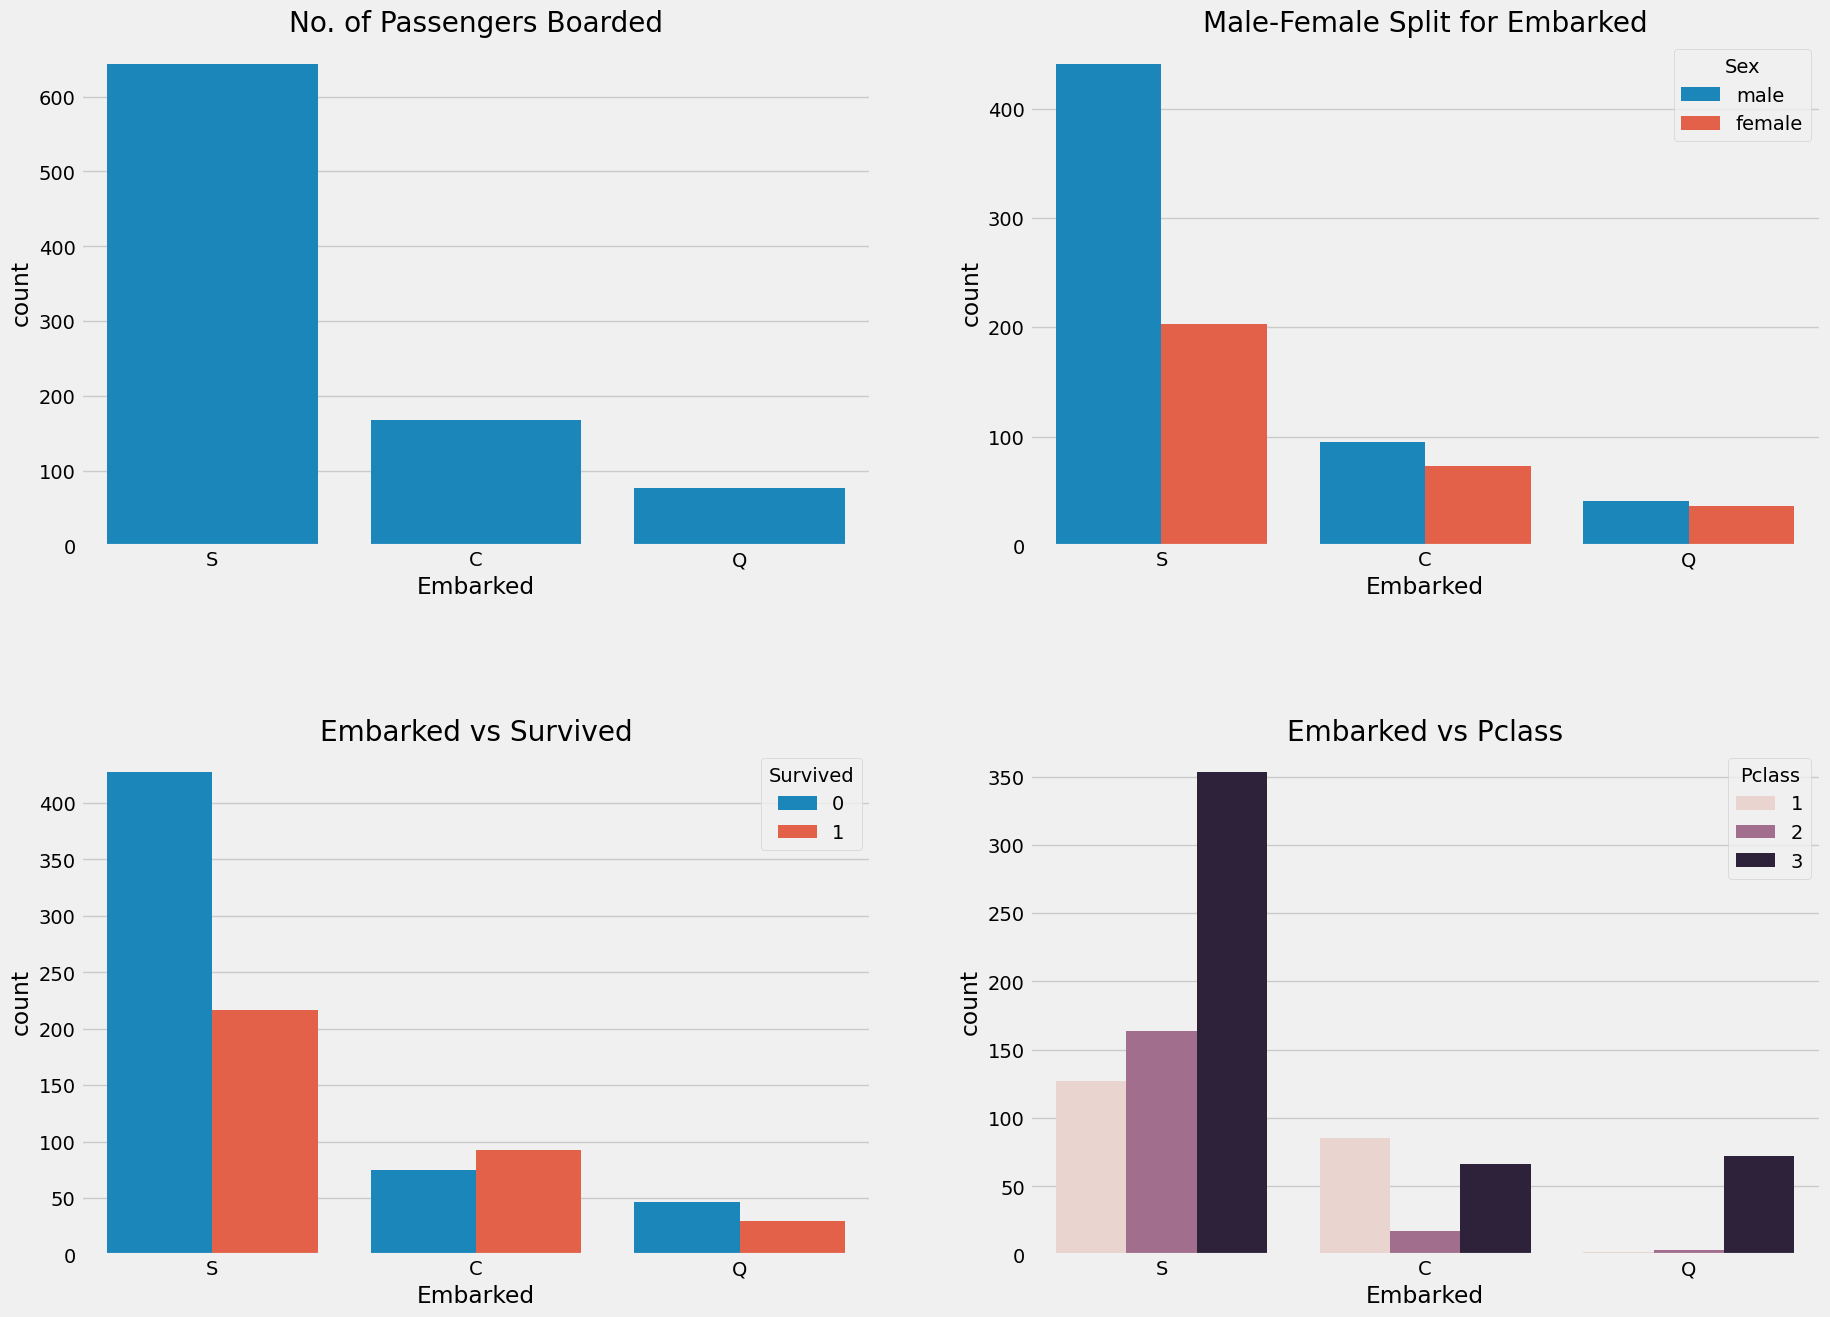

In [209]:
f, ax=plt.subplots(2,2,figsize=(20,15))

sns.countplot(x='Embarked', data=df, ax=ax[0,0])
ax[0,0].set_title('No. of Passengers Boarded')

sns.countplot(x='Embarked', hue='Sex', data=df, ax=ax[0,1])
ax[0,1].set_title('Male-Female Split for Embarked')

sns.countplot(x='Embarked', hue='Survived', data=df, ax=ax[1,0])
ax[1,0].set_title('Embarked vs Survived')

sns.countplot(x='Embarked', hue='Pclass', data=df, ax=ax[1,1])
ax[1,1].set_title('Embarked vs Pclass')

plt.subplots_adjust(wspace=0.2, hspace=0.4)

Observations

1) Maximum passenger boarded for 2.Majority of them being form Pclass3.

2) The passengers from C look to be lucky as a good proportion of them survived. the reasom for this maybe the rescure of all the Pclass 1 and Pcalss2 Passengers.

3) The embard S looks to the port from where majority of the rich people boarded. STill the chances for survival is low here, theat is because many passengers from Pclass 3 around 81% didn't survive.

4)  Prot Q ahd almost 95% of the passsengers were from Pclass 3.

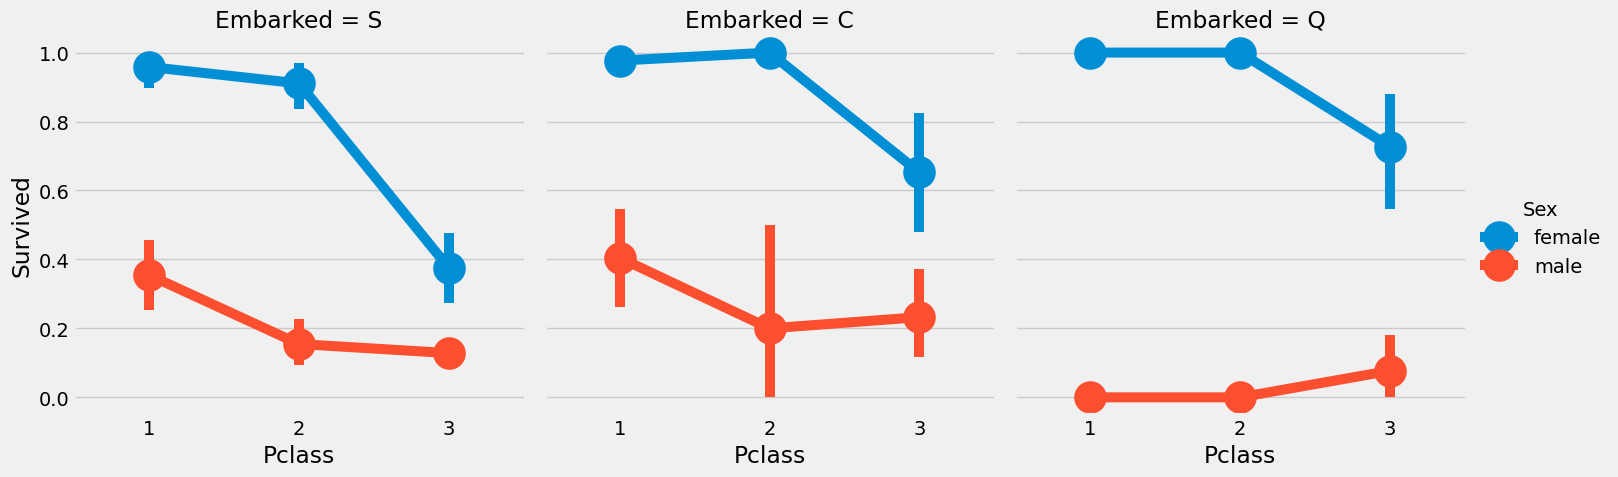

In [213]:
sns.catplot(x='Pclass', y='Survived', hue="Sex", col="Embarked", data=df,kind = 'point')

Obesrvation

1) The survival chances are almost 1 for women for Pclassa 1 and Pcalss2 inrrespective of the Pclass.

2) Prot S looks for be very unlucky for Pclass 3 passengers ans the sruvival reate for both men and women is vry low(Money Matters)

3) Port Q looks to be unluckedst for Men, as almost as were from Pclass 3.


Filling Embarked NaN
As w esaw theat maximum passengers boarded form Port s, we replace NaN with S.

In [214]:
df['Embarked'].fillna('S', inplace=True)

In [215]:
df.Embarked.isnull().any()

np.False_

In [217]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
 12  Initial      891 non-null    object 
dtypes: float64(2), int64(5), object(6)
memory usage: 90.6+ KB


In [224]:
df['Embarked'].

TypeError: Series.isnull() takes 1 positional argument but 2 were given

## **Sibsp --> Discrete Feature**
This feature respresents whether a person  is alone or with his family members.

Sibling = brother, sister, stepbrother, stepsister

Spouse = husband, wife


In [226]:
pd.crosstab([df.SibSp] ,df.Survived).style.background_gradient(cmap='summer_r')

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


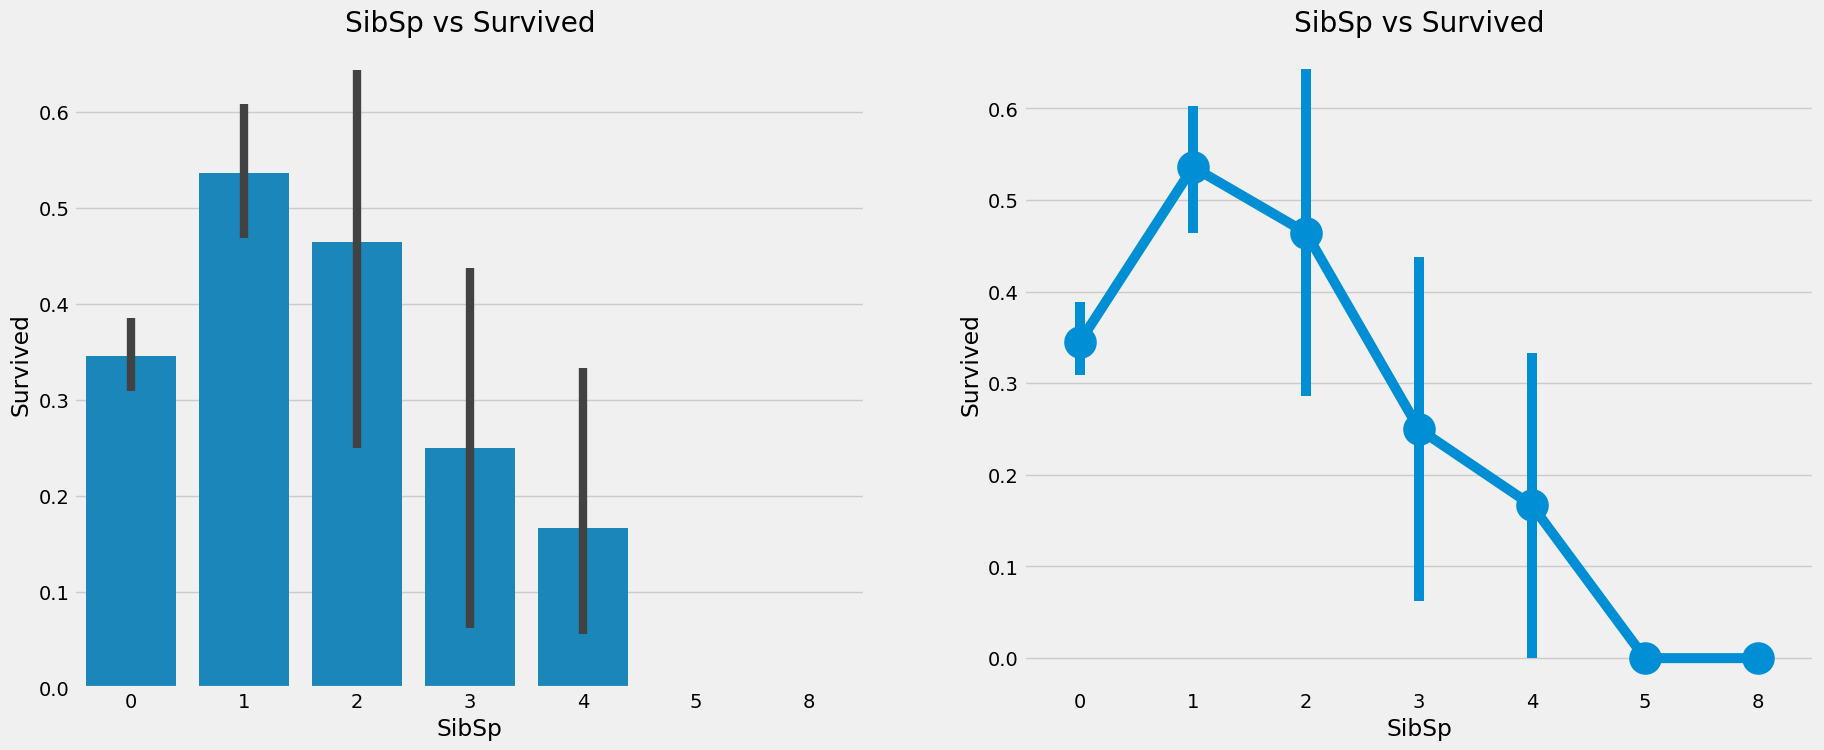

In [247]:
f, ax=plt.subplots(1,2,figsize=(20,8))

sns.barplot(x= 'SibSp',y='Survived', data=df, ax=ax[0])
ax[0].set_title('SibSp vs Survived')

# sns.catplot(x='SibSp', y='Survived', data=df, ax = ax[1], kind='point')
sns.pointplot(x='SibSp', y='Survived', data=df, ax=ax[1])

ax[1].set_title('SibSp vs Survived')

plt.close(2)
plt.show()

In [250]:
pd.crosstab(df.SibSp, df.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
SibSp,,,
0,137,120,351
1,71,55,83
2,5,8,15
3,3,1,12
4,0,0,18
5,0,0,5
8,0,0,7


Observation

The barplot and pointplot shows what If a passenger is alone onboard with no siblings, he have 34.5% sruvival rate. the graph roughly decreased if the number of silblings incrase. This makes sense. That is , if I have a family on board., I will try to save them instead of saving myself first. Surprisingly the survival ofr failmiles with 5-8 members i s0%. the reason may be Pclass??

The reaso in Pclas. The crosstab showes that Person with SibSp>3 were all in Pclass3. It is imminent that all the large families in Pclass3(>3) died.



In [ ]:
T

## **Parch**

In [251]:
pd.crosstab(df.Parch, df.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
Parch,,,
0,163,134,381
1,31,32,55
2,21,16,43
3,0,2,3
4,1,0,3
5,0,0,5
6,0,0,1


The corsstab again shows that larger familyis were in Pclass3.

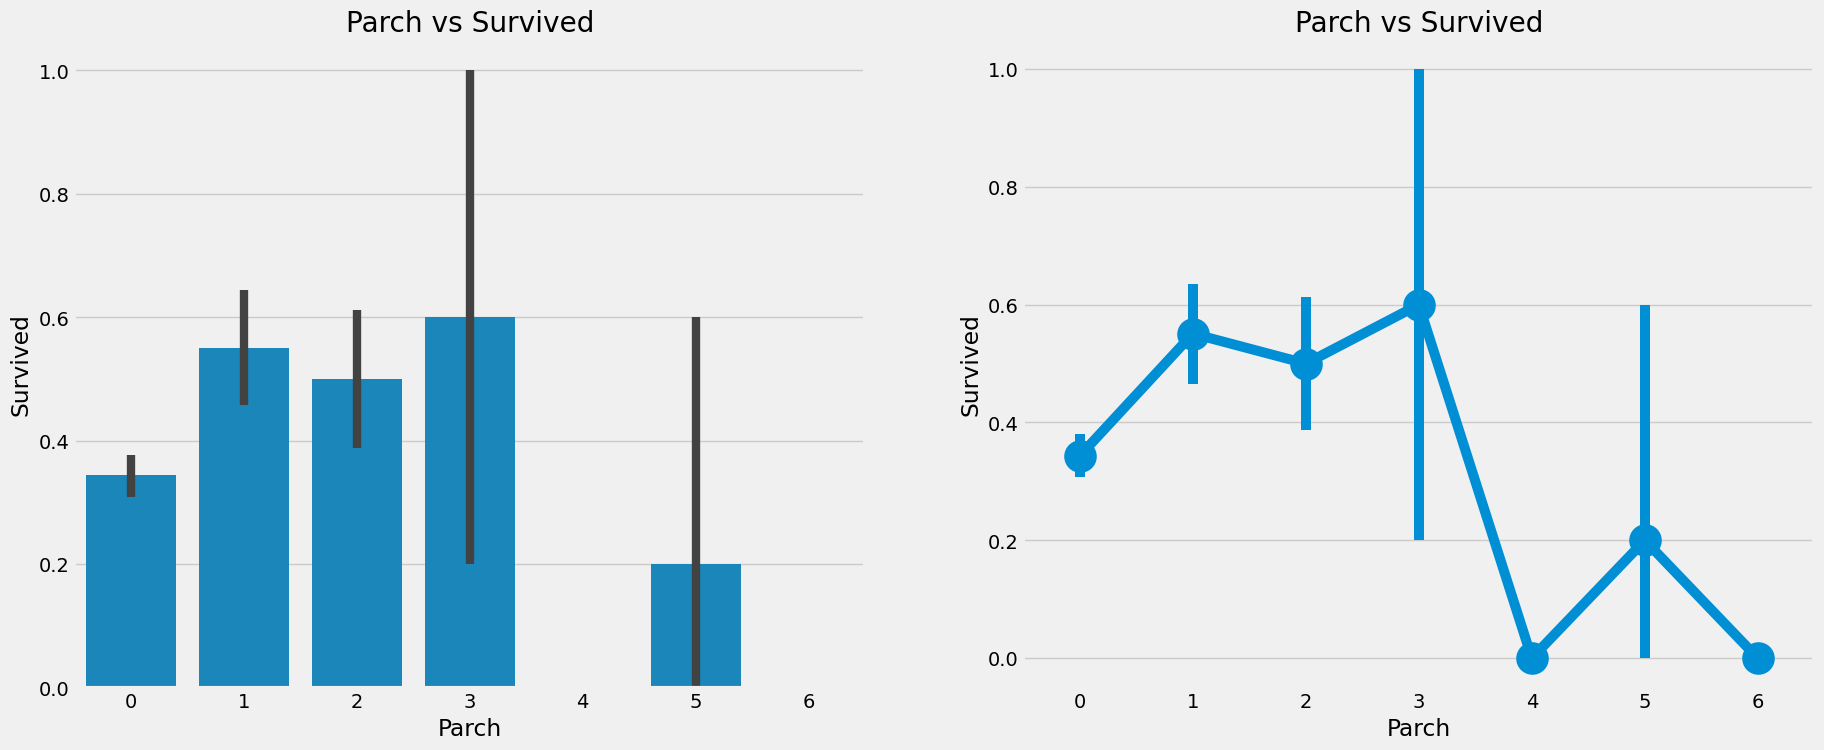

In [260]:
f, ax=plt.subplots(1,2,figsize=(20,8))

sns.barplot(x='Parch', y='Survived', data=df, ax=ax[0])
ax[0].set_title('Parch vs Survived')


sns.pointplot(x='Parch', y='Survived', data=df, ax=ax[1])
ax[1].set_title('Parch vs Survived')

plt.close(2)

Observations

Here too the results are quite similar, Passenges with their parents onboard have greater chance o f survival. it however reduces as teh number goess up..

The changes of survivla is good for somebody who has 1-3 parents on the ship. Being along also proved to be fatal and teh chnaces for survival decreased when somebody has >4 parents on th ship.

In [260]:
h

## **Fare  -->> Continous Feature**

In [262]:
print('High Fare was:', df['Fare'].max())
print('Low Fare was:', df['Fare'].min())
print('Average Fare was:', df['Fare'].mean())

High Fare was: 512.3292
Low Fare was: 0.0
Average Fare was: 32.204207968574636


The lowest fare is 1..1 Wow!!  a Free luxorious ride.


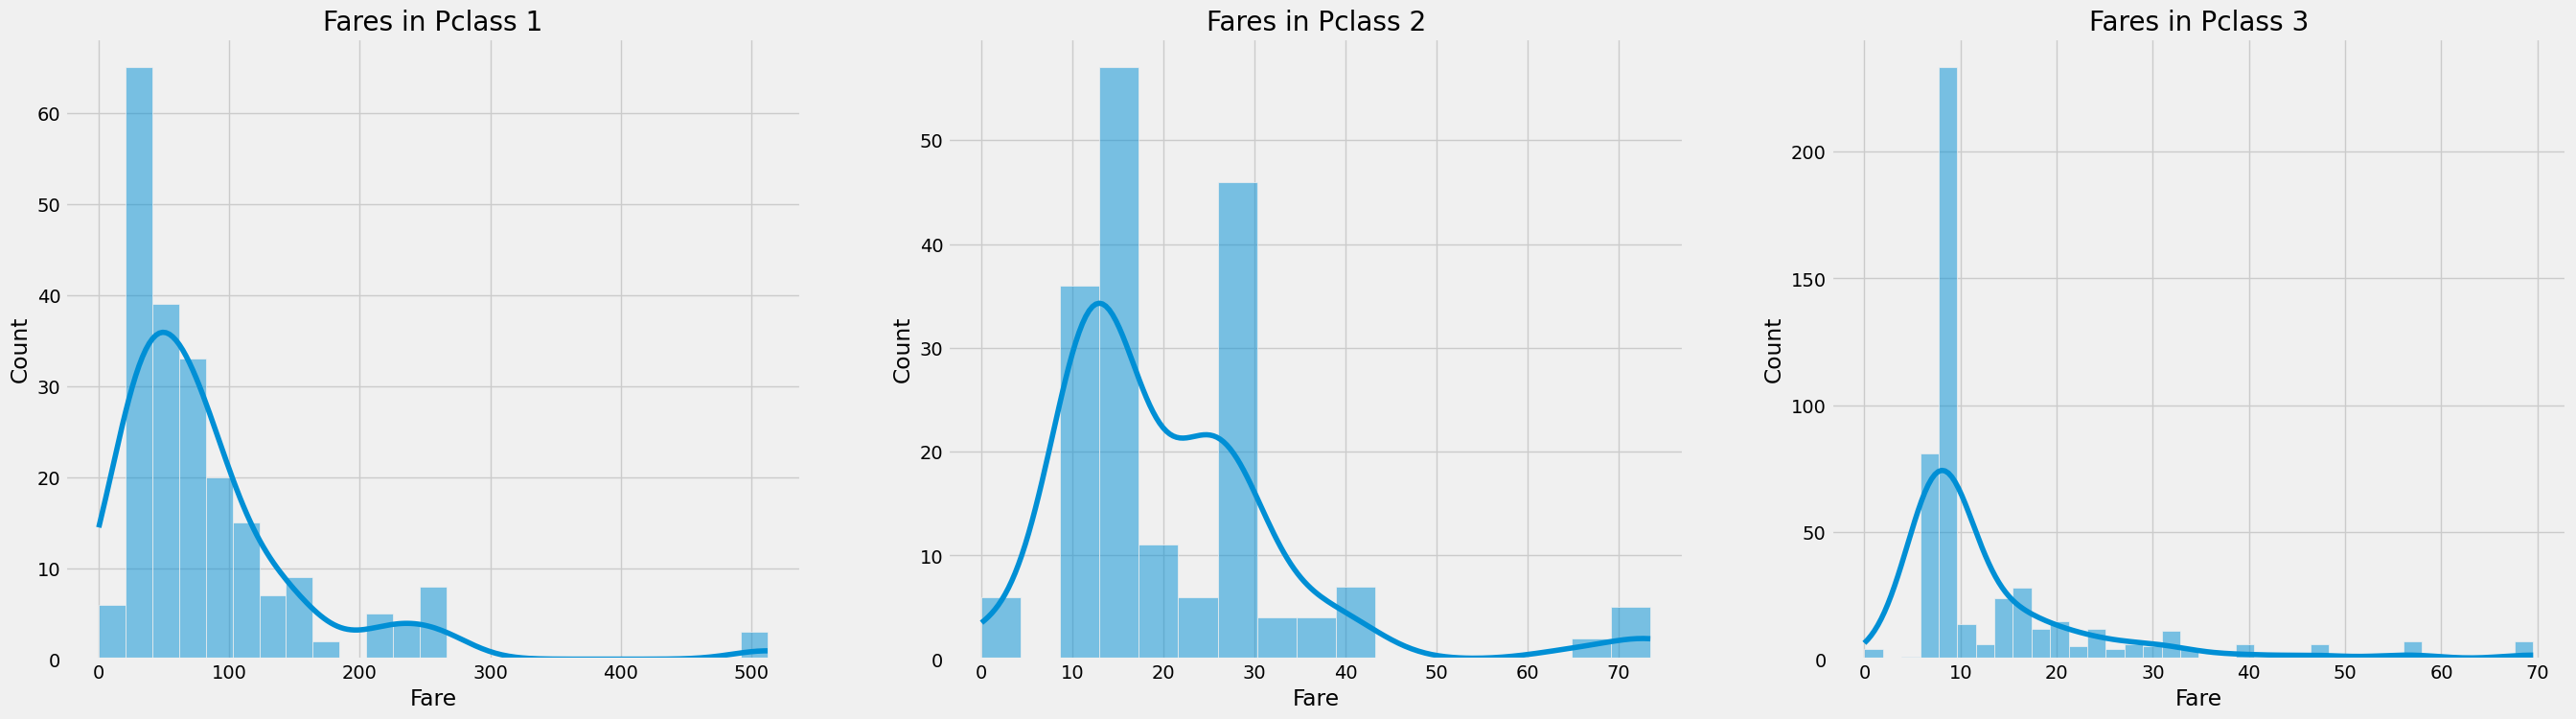

In [282]:
f, ax=plt.subplots(1,3,figsize=(30,8))

sns.histplot(df[df['Pclass']==1].Fare, ax=ax[0], kde=True)
ax[0].set_title('Fares in Pclass 1')

sns.histplot(df[df['Pclass']==2].Fare, ax=ax[1], kde=True)
ax[1].set_title('Fares in Pclass 2')

sns.histplot(df[df['Pclass']==3].Fare, ax=ax[2], kde=True)
ax[2].set_title('Fares in Pclass 3')

plt.show()




There looks to be a large distribution inthe fares of Passengers in Pclass1 and this distributin goes on decreasing as the stadards reduces. As this is also continous, we can oonver into discrete values by susing binning.


Observation in a Nutshelll for all features

Sex : the chance of sruvival for women is high a scompared t men.

Pclass : There isa visible trend that being a 1st class passenger gives you better chance of survival. The survival rate ofr Pclass 3 is very low. For women, the chance of survial form Pclasa 1 is almost 1 and is high too for those form Pclass 2. Money Wins!!

Age : Childre les than 5-10 year do have a high chance of survival . Passengers between age group 15 to 35 died a lot.

Embarked : this ws a very interesting feature. The chances of uvivla at C Loks to be better than even though the majority of Pclass 1 passengers got up at S. Passengers at Q were all from Pclass3.

Parch + SibSp : Having 1-2 siblings, spouse on board or 1-3 Parents shows a greater chane of probabiliy tather than being along or havig large fmily tarvelling with you.

Correlation Between the Features

**bold text**

<Axes: >

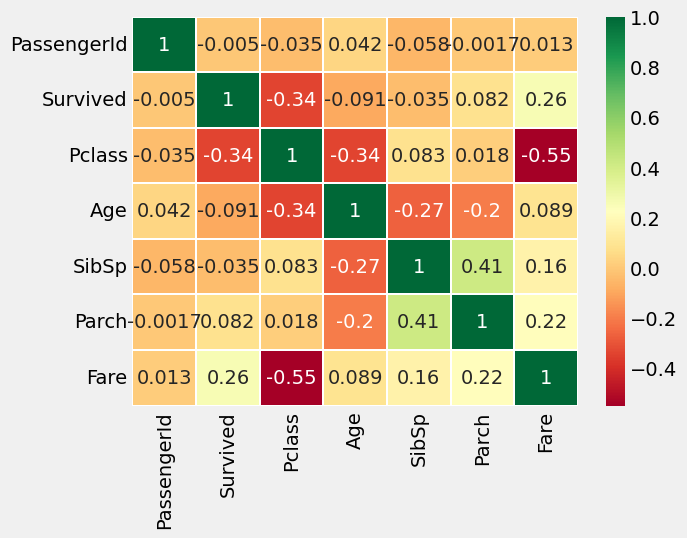

In [294]:
# # sns.heatmap(df.corr(), annot=True, cmap='RdYlGn', linewidths=0.2)
# sns.heatmap(df.corr(), annot=True, cmap='RdYlGn', linewidths=0.2)

cols = ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
sns.heatmap(df[cols].corr(), annot=True, cmap='RdYlGn', linewidths=0.2)

Interpreting the Heatmap

the first thing to note is that only thenumeric featuers arecompared as it is obvious that we cannot coorrelate between alphabets or strins. before understanding the plot, let us see what wxactly correlation is.

Positive Correlation : If an increas in feature iA leads to Increase in feature B, then they are positively correlated. A value 1 menas perfect positive correlation.

Negative correlation : if an increase in feature A leads to decrease in featue B, tehn they are negatively corrleated  Avlaue - 1 means perfect negative colleation.

Now lets say that two featurea re highly or perfectly correlated so the increase in on lead to incrase in the other, This means that bth the features are containin higlly similar information and there is very little or no variance in inforamction this is know as mulit collinearlti as both of them conatin almost the same information.

So do you think we should use both of them as one of themi s reduncant. Whiile making or training models, we shol dtry to eliminate redundant features as it rduces trainng time and many such advantages.

Now from the above heatmap we can see that the features are not much correlated. The highest correlation is between SibSp and Parch ie 1.41. So we can carry on with all features.


In [ ]:

Part 2 : Feature Engineering and Data


## **Part 2 : Feature Engineering and Data Cleaning**

SyntaxError: unterminated string literal (detected at line 5) (<ipython-input-295-b1a654fa8bbb>, line 5)

Now what is Feature Engineering?

Wheneve we are given a dataset with features, it is no necessar that all the features will be important., there maybe be many redundant features which should be eliminated. Aslo we can get  or add new features by obsreving aor extracting information form tother features.

An exmaple would be getting the initial feature using the Name feature, Let's see if we cna get any new features and eliminate a few. Also we will transofrmt he existing relevant features to suitable form for prodictive

Age-band

Problem with Age feature:

As I have menttinen eariler that Age is a continous feature, there is sa problem with Continous varioables in Machinn Learning Model.s

Eg  If I say to group or arrange Sport Person by Sex, we cna easily segregate them by male and female.

Now If I say to group them by eheir Age, Then how would you do it.? If there are 30 peroson, there amy be 30 age values. Now this is porblematic.

We need t conver these continous values into categoricla valuees by either Bingging or Nrmalisation. I willb e suing binning i.e group a range of ages into a dsingle bing or assing them a sing value.

Okay so the maxiumu age of a passenger was 80. so let's divided thte range form 0-80 into 5bins. so80/5=16. So bins of size 16.

In [ ]:
df['Age_band']=0
df.loc[df['Age']<=16, "Age_band']=0
df.loc